# **Introduction**


**Dataset Used:** Sleep_health_and_lifestyle_dataset

**Dataset Columns:**

*   **Person ID:** An identifier for each individual.
*   **Gender:** The gender of the person (Male/Female).
*   **Age:** The age of the person in years.
*   **Occupation:** The occupation or profession of the person.
*   **Sleep Duration (hours):** The number of hours the person sleeps per day.
*   **Quality of Sleep (scale: 1-10):** A subjective rating of the quality of sleep, ranging from 1 to 10.
*   **Physical Activity Level (minutes/day):** The number of minutes the person engages in physical activity daily.
*   **Stress Level (scale: 1-10):** A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
*   **BMI Category:** The BMI category of the person (Underweight, Normal, Overweight, Obese).
*   **Blood Pressure (systolic/diastolic):** The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
*   **Heart Rate (bpm):** The resting heart rate of the person in beats per minute.
*   **Daily Steps:** The number of steps the person takes per day.
*   **Sleep Disorder:** The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

**Details about Sleep Disorder Column:**

*   **None:** The individual does not exhibit any specific sleep disorder.
*   **Insomnia:** The individual experiences difficulty in falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
*   **Sleep Apnea:** The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.


**Importing necessary packages**

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

**Uploading the dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dataset/Sleep_health_and_lifestyle_dataset.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# **Preprocessing the data**

**Checking whether the dataset contains any missing values or not**

In [ ]:
df.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

**Dropping unnecessary columns from the dataset**

In [ ]:
df.drop(['Person ID'],axis=1,inplace=True)
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


**Checking each attribute in the column 'BMI Category'**

In [ ]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [ ]:
df['BMI Category'].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64

**Renplacing the attributes as follows:**

'Normal Weight' --> 'Under Weight'

In [ ]:
df['BMI Category']=df['BMI Category'].str.replace('Normal Weight','Under Weight')
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
df['BMI Category'].value_counts()

Normal          195
Overweight      148
Under Weight     21
Obese            10
Name: BMI Category, dtype: int64

**Splitting the column 'Blood Pressure' as 'Systolic BP' and 'Diastolic BP'**

In [ ]:
print(df['Blood Pressure'].dtypes)

object


In [ ]:
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic BP'] = pd.to_numeric(df['Systolic BP'])
df['Diastolic BP'] = pd.to_numeric(df['Diastolic BP'])
df = df.drop(columns='Blood Pressure')
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


# **Visualization**

**Pie Chart - Sleep Disorder**

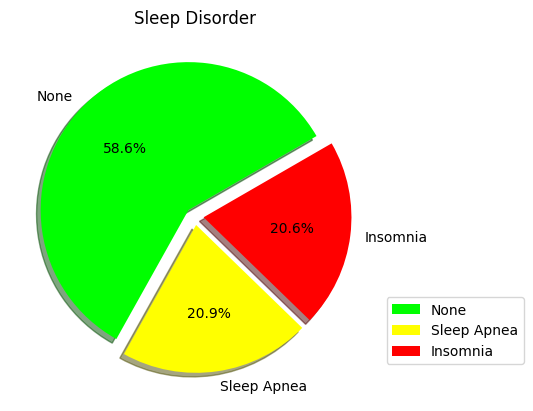

In [ ]:
y_count=df['Sleep Disorder'].value_counts()
status=['None','Sleep Apnea','Insomnia']
plt.title('Sleep Disorder')
plt.pie(y_count,labels=status,colors=['lime','yellow','red'],shadow=True,startangle=30,explode=(0.06,0.06,0.06),autopct='%1.1f%%')
plt.legend(loc='best',bbox_to_anchor=(1,0.3))
plt.show()

*   From the pie chart, it can be clearly seen that the dataset used here is an imbalanced dataset.

**Countplot - BMI Category**

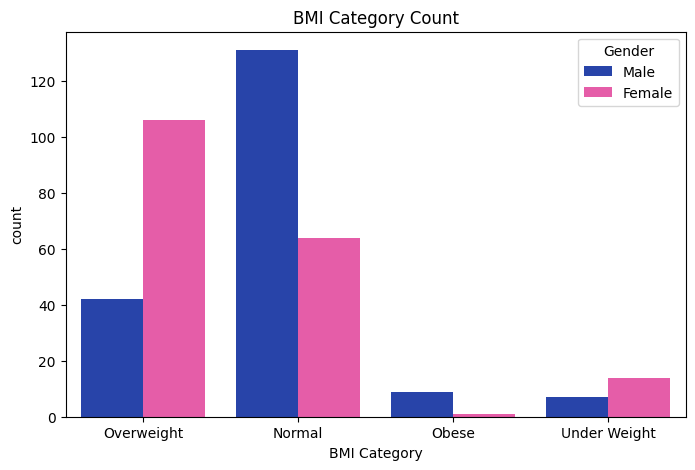

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='BMI Category',data=df,hue='Gender',palette=['#1338BE','#FC46AA'])
plt.title('BMI Category Count')
plt.show()


In this dataset,
*    Most of the females have overweight.
*    Most of the males have normal weight.



**Correlation Heatmap**

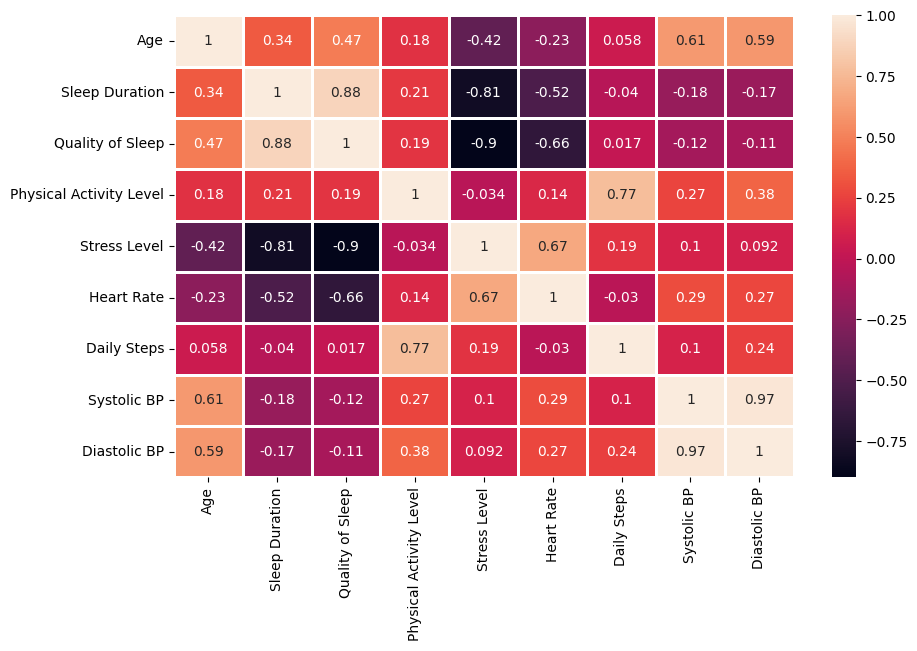

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,linewidths=1)
plt.show()

**Barplot - Occupation vs Stress Level**

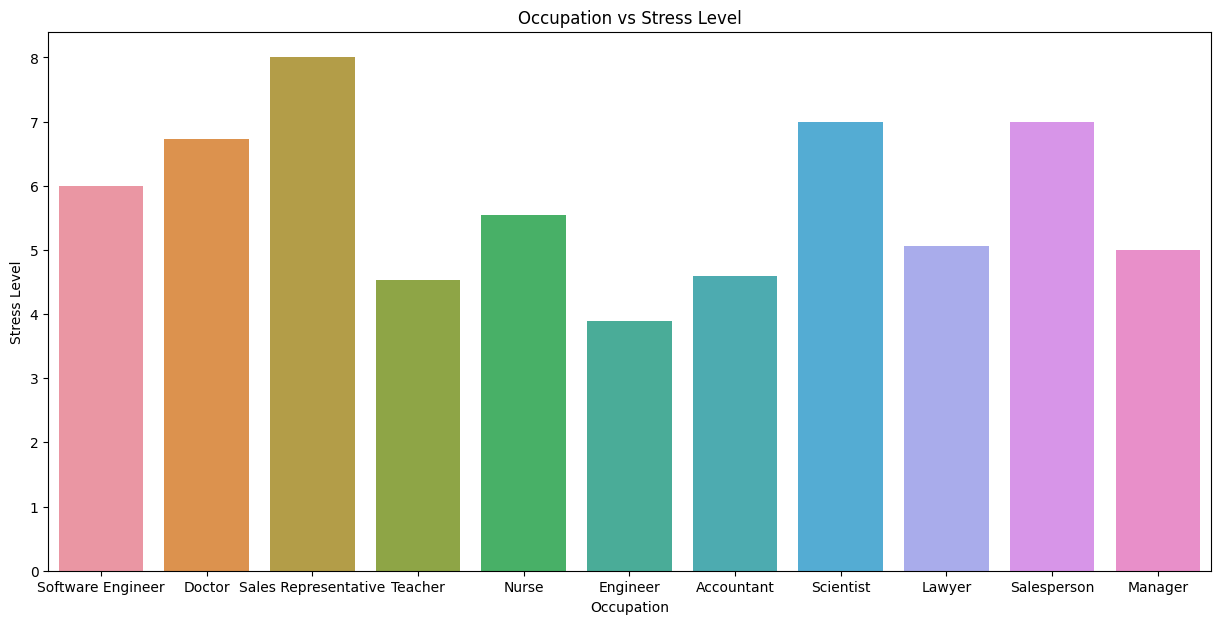

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x='Occupation',y='Stress Level',data=df,ci=None)
plt.title('Occupation vs Stress Level')
plt.show()

*   According to the data provided here, Sales Representative job has a high stress level of 8 followed by Scientist(7).
*   Engineer has the lowest stress level of 4.



**Histogram - Age**

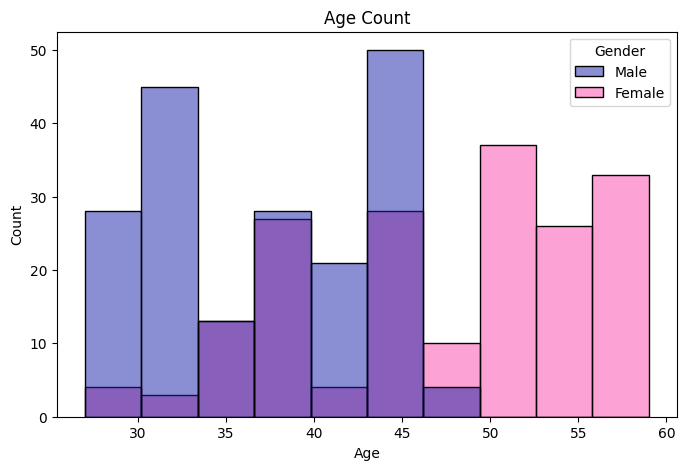

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df,x='Age',hue='Gender',palette=['#1520A6','#FC46AA'])
plt.title('Age Count')
plt.show()

*   Males age is between 26 and 50
*   Females age is between 26 and 60

**Barplot - Sleep Disorder vs Heart Rate**

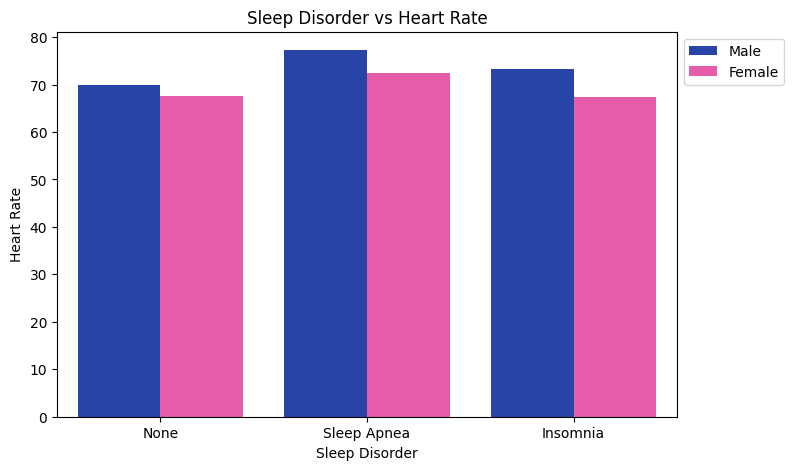

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Sleep Disorder',y='Heart Rate',data=df,hue='Gender',palette=['#1338BE','#FC46AA'],ci=None)
plt.title('Sleep Disorder vs Heart Rate')
plt.legend(loc='best',bbox_to_anchor=(1,1))
plt.show()

*   The resting heart rate of male (Age 26-55) is 62 - 67 (Good  Condition)
*   The resting heart rate of female (Age 26-65) is 65 - 68 (Good  Condition)

**Checking the datatype of each column in the dataset**

In [ ]:
df.dtypes

Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
Systolic BP                  int64
Diastolic BP                 int64
dtype: object

**Converting string data to numeric data**

In [ ]:
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
le4=LabelEncoder()
df['Gender']=le1.fit_transform(df['Gender'])
df['Occupation']=le2.fit_transform(df['Occupation'])
df['BMI Category']=le3.fit_transform(df['BMI Category'])
df['Sleep Disorder']=le4.fit_transform(df['Sleep Disorder'])
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,27,9,6.1,6,42,6,2,77,4200,1,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
3,1,28,6,5.9,4,30,8,1,85,3000,2,140,90
4,1,28,6,5.9,4,30,8,1,85,3000,2,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,5,8.1,9,75,3,2,68,7000,2,140,95
370,0,59,5,8.0,9,75,3,2,68,7000,2,140,95
371,0,59,5,8.1,9,75,3,2,68,7000,2,140,95
372,0,59,5,8.1,9,75,3,2,68,7000,2,140,95


**Input Data**

In [ ]:
X=df.drop(['Sleep Disorder'],axis=1)
X

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic BP,Diastolic BP
0,1,27,9,6.1,6,42,6,2,77,4200,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,125,80
2,1,28,1,6.2,6,60,8,0,75,10000,125,80
3,1,28,6,5.9,4,30,8,1,85,3000,140,90
4,1,28,6,5.9,4,30,8,1,85,3000,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,5,8.1,9,75,3,2,68,7000,140,95
370,0,59,5,8.0,9,75,3,2,68,7000,140,95
371,0,59,5,8.1,9,75,3,2,68,7000,140,95
372,0,59,5,8.1,9,75,3,2,68,7000,140,95


**Output Data / Class Label / Target**

In [ ]:
y=df['Sleep Disorder']
y

0      1
1      1
2      1
3      2
4      2
      ..
369    2
370    2
371    2
372    2
373    2
Name: Sleep Disorder, Length: 374, dtype: int64

**Scaling the input data to normalize the values**

In [ ]:
mms=MinMaxScaler()
Xm=mms.fit_transform(X)
Xm

array([[1.        , 0.        , 0.9       , ..., 0.17142857, 0.40740741,
        0.4       ],
       [1.        , 0.03125   , 0.1       , ..., 1.        , 0.37037037,
        0.25      ],
       [1.        , 0.03125   , 0.1       , ..., 1.        , 0.37037037,
        0.25      ],
       ...,
       [0.        , 1.        , 0.5       , ..., 0.57142857, 0.92592593,
        1.        ],
       [0.        , 1.        , 0.5       , ..., 0.57142857, 0.92592593,
        1.        ],
       [0.        , 1.        , 0.5       , ..., 0.57142857, 0.92592593,
        1.        ]])

**Splitting the data as training dataset and testing dataset for training the machine and testing the accuracy**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(Xm,y,test_size=0.3,random_state=1)

# **Models/Algorithms**

**K-Nearest Neighbor**

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
y_pred_knn

array([1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0,
       1, 2, 2, 0, 1, 1, 2, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 2, 1])

**Support Vector Classification**

In [ ]:
sv=SVC()
sv.fit(X_train,y_train)
y_pred_sv=sv.predict(X_test)
y_pred_sv

array([1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 2, 0,
       1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 2, 1])

**Naive Bayes Classification**

In [ ]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb=nb.predict(X_test)
y_pred_nb

array([1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 0, 0,
       1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 1,
       0, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 2, 1])

**Decision Tree Classification**

In [ ]:
de=DecisionTreeClassifier()
de.fit(X_train,y_train)
y_pred_de=de.predict(X_test)
y_pred_de

array([1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 2, 0,
       1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 1,
       0, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 2, 1])

# **Ensemble Methods**

**Random Forest Classification**

In [ ]:
rf=RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
y_pred_rf

array([1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 2, 0,
       1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 1,
       0, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 2, 1])

**Ada Boost Classification**

In [ ]:
ad=AdaBoostClassifier(random_state=1)
ad.fit(X_train,y_train)
y_pred_ad=ad.predict(X_test)
y_pred_ad

array([1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 2, 0,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1,
       0, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 2, 1])

**Gradient Boost Classification**

In [ ]:
gd=GradientBoostingClassifier(random_state=1)
gd.fit(X_train,y_train)
y_pred_gd=gd.predict(X_test)
y_pred_gd

array([1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 2, 0,
       1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 1,
       0, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 2, 1])

**XG Boost Classification**

In [ ]:
xg=XGBClassifier(random_state=1)
xg.fit(X_train,y_train)
y_pred_xg=xg.predict(X_test)
y_pred_xg

array([1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 2, 0,
       1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 1,
       0, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 2, 1])

**Stacking Classification**

In [ ]:
lst=[('knn',KNeighborsClassifier()),('svc',SVC()),('nbc',GaussianNB()),('dtc',DecisionTreeClassifier(random_state=1)),('rfc',RandomForestClassifier(random_state=1)),('abc',AdaBoostClassifier()),('gbc',GradientBoostingClassifier()),('xbc',XGBClassifier())]
sc=StackingClassifier(estimators=lst,final_estimator=LogisticRegression())
sc.fit(X_train,y_train)
y_pred_sc=sc.predict(X_test)
y_pred_sc

array([1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 2, 0,
       1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 2, 1])

# **Preformance Measures**

**Accuracy Score, Classification Report, Confusion Matrix Display**

In [ ]:
lst=[knn,sv,nb,de,rf,ad,gd,xg,sc]
acc_score1=[]
for i in lst:
  print('*'*20,i,'*'*20)
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  acc=accuracy_score(y_test,y_pred)*100
  print('Accuracy Score: ',acc)
  print(classification_report(y_test,y_pred))
  print('_'*200)
  acc_score1.append(acc)

******************** KNeighborsClassifier() ********************
Accuracy Score:  86.72566371681415
              precision    recall  f1-score   support

           0       0.69      0.78      0.73        23
           1       0.91      0.92      0.92        65
           2       0.95      0.80      0.87        25

    accuracy                           0.87       113
   macro avg       0.85      0.84      0.84       113
weighted avg       0.87      0.87      0.87       113

________________________________________________________________________________________________________________________________________________________________________________________________________
******************** SVC() ********************
Accuracy Score:  88.49557522123894
              precision    recall  f1-score   support

           0       0.80      0.70      0.74        23
           1       0.91      0.95      0.93        65
           2       0.88      0.88      0.88        25

    accuracy     

**Accuracy Table**

In [ ]:
alg_name=['KNeighborsClassifier','SVC','GaussianNB','DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier','XGBClassifier','StackingClassifier']
dic={'Model':alg_name,'Accuracy with Default Parameters':acc_score1}
acc1=pd.DataFrame(dic)
acc1.sort_values(by='Accuracy with Default Parameters',ascending=False,ignore_index=True,inplace=True)
# acc1.style.highlight_max(subset=['Accuracy with Default Parameters'],color='green',axis=0)
acc1

,Model,Accuracy with Default Parameters
0,RandomForestClassifier,89.380531
1,GradientBoostingClassifier,89.380531
2,XGBClassifier,89.380531
3,SVC,88.495575
4,GaussianNB,88.495575
5,StackingClassifier,88.495575
6,KNeighborsClassifier,86.725664
7,DecisionTreeClassifier,86.725664
8,AdaBoostClassifier,81.415929


# **Sampling**

In [ ]:
ou=SMOTEENN(random_state=1)
Xs,ys=ou.fit_resample(X,y)

In [ ]:
ys.value_counts()

1    169
0    162
2    120
Name: Sleep Disorder, dtype: int64

**Scaling the input data to normalize the values**

In [ ]:
Xs=mms.fit_transform(Xs)
Xs

array([[1.        , 0.03225806, 1.        , ..., 0.0340318 , 0.92592593,
        0.75      ],
       [1.        , 0.25806452, 1.        , ..., 0.22722544, 0.51851852,
        0.45      ],
       [1.        , 0.4516129 , 0.7       , ..., 0.40555803, 0.55555556,
        0.5       ],
       ...,
       [0.        , 0.67741935, 0.5       , ..., 1.        , 0.92592593,
        1.        ],
       [0.        , 0.93548387, 0.5       , ..., 0.55416852, 0.92592593,
        1.        ],
       [0.        , 0.70967742, 0.5       , ..., 1.        , 0.92592593,
        1.        ]])

# **Feature Extraction**

**Principal Component Analysis**

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=7,random_state=1)
Xs=pca.fit_transform(Xs)
Xs

array([[ 6.04845455e-01, -7.42411163e-01, -2.84017284e-01, ...,
         1.59133562e-01,  6.69560556e-01,  2.64439668e-01],
       [ 6.42899083e-01, -6.57841181e-01, -4.89970174e-01, ...,
        -6.67137583e-02, -1.68397638e-04,  2.06465692e-01],
       [ 5.33924132e-01, -5.27683840e-01, -1.85644174e-01, ...,
         2.54510972e-02, -1.65945428e-01,  2.14841496e-02],
       ...,
       [-4.55716362e-01, -8.65057281e-01,  6.03094995e-01, ...,
        -4.91818966e-02,  5.62390074e-02, -8.24203162e-02],
       [-1.04792713e+00,  2.62442219e-01,  2.74474751e-01, ...,
         8.52134556e-02, -4.97351218e-02, -8.49034007e-03],
       [-4.68925861e-01, -8.57697531e-01,  6.07774635e-01, ...,
        -3.45069622e-02,  4.18449343e-02, -9.27437187e-02]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(Xs,ys,test_size=0.25,random_state=1)

In [ ]:
l1,l2,l3=0,0,0
for i in range(3,30,2):
  knn2=KNeighborsClassifier(n_neighbors=i)
  knn2.fit(X_train,y_train)
  y_pred=knn2.predict(X_test)
  ac1=accuracy_score(y_test,y_pred)
  if ac1>l1:
    l1=ac1
    n=i
print(n,l1)
lst1=['rbf','poly','linear']
for i in lst1:
  sv2=SVC(kernel=i)
  sv2.fit(X_train,y_train)
  y_pred=sv2.predict(X_test)
  ac2=accuracy_score(y_test,y_pred)
  if ac2>l2:
    l2=ac2
    k=i
print(k,l2)
lst2=['gini','entropy']
for i in lst2:
  de2=DecisionTreeClassifier(criterion=i)
  de2.fit(X_train,y_train)
  y_pred=de2.predict(X_test)
  ac3=accuracy_score(y_test,y_pred)
  if ac3>l3:
    l3=ac3
    c=i
print(c,l3)

3 0.9911504424778761
rbf 1.0
gini 0.9911504424778761


**K-Nearest Neighbor**

In [ ]:
knn2=KNeighborsClassifier(n_neighbors=n)
knn2.fit(X_train,y_train)
y_pred_knn=knn2.predict(X_test)
y_pred_knn

array([2, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 0,
       2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1, 2, 1,
       0, 1, 1])

**Support Vector Classification**

In [ ]:
sv2=SVC(kernel=k)
sv2.fit(X_train,y_train)
y_pred_sv=sv2.predict(X_test)
y_pred_sv

array([2, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0,
       0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 0,
       2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1, 2, 1,
       0, 1, 1])

**Naive Bayes Classification**

In [ ]:
nb2=GaussianNB()
nb2.fit(X_train,y_train)
y_pred_nb=nb2.predict(X_test)
y_pred_nb

array([2, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0,
       0, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 2, 1, 2, 2, 0, 0, 0, 2, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1, 2, 1,
       0, 1, 1])

**Decision Tree Classification**

In [ ]:
de2=DecisionTreeClassifier(criterion=c)
de2.fit(X_train,y_train)
y_pred_de=de2.predict(X_test)
y_pred_de

array([2, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 0,
       2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1, 2, 1,
       0, 1, 1])

# **Ensemble Methods**

**Random Forest Classification**

In [ ]:
rf2=RandomForestClassifier(random_state=1)
rf2.fit(X_train,y_train)
y_pred_rf=rf2.predict(X_test)
y_pred_rf

array([2, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0,
       0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 0,
       2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1, 2, 1,
       0, 1, 1])

**Ada Boost Classification**

In [ ]:
ad2=AdaBoostClassifier(random_state=1)
ad2.fit(X_train,y_train)
y_pred_ad=ad2.predict(X_test)
y_pred_ad

array([2, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0,
       0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 0,
       2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1, 2, 1,
       0, 1, 1])

**Gradient Boost Classification**

In [ ]:
gd2=GradientBoostingClassifier(random_state=1)
gd2.fit(X_train,y_train)
y_pred_gd=gd2.predict(X_test)
y_pred_gd

array([2, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 0,
       2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1, 2, 1,
       0, 1, 1])

**XG Boost Classification**

In [ ]:
xg2=XGBClassifier(random_state=1)
xg2.fit(X_train,y_train)
y_pred_xg=xg2.predict(X_test)
y_pred_xg

array([2, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 0,
       2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1, 2, 1,
       0, 1, 1])

**Stacking Classification**

In [ ]:
lst=[('knn',KNeighborsClassifier()),('svc',SVC()),('nbc',GaussianNB()),('dtc',DecisionTreeClassifier(random_state=1)),('rfc',RandomForestClassifier(random_state=1)),('abc',AdaBoostClassifier()),('gbc',GradientBoostingClassifier()),('xbc',XGBClassifier())]
sc2=StackingClassifier(estimators=lst,final_estimator=LogisticRegression())
sc2.fit(X_train,y_train)
y_pred_sc=sc2.predict(X_test)
y_pred_sc

array([2, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 0,
       2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1, 2, 1,
       0, 1, 1])

# **Preformance Measures**

**Accuracy Score, Classification Report, Confusion Matrix Display**

In [ ]:
lst=[knn2,sv2,nb2,de2,rf2,ad2,gd2,xg2,sc2]
acc_score2=[]
for i in lst:
  print('*'*20,i,'*'*20)
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  acc=accuracy_score(y_test,y_pred)*100
  print('Accuracy Score: ',acc)
  print(classification_report(y_test,y_pred))
  print('_'*200)
  acc_score2.append(acc)

******************** KNeighborsClassifier(n_neighbors=3) ********************
Accuracy Score:  99.11504424778761
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.98      1.00      0.99        53
           2       1.00      0.97      0.98        30

    accuracy                           0.99       113
   macro avg       0.99      0.99      0.99       113
weighted avg       0.99      0.99      0.99       113

________________________________________________________________________________________________________________________________________________________________________________________________________
******************** SVC() ********************
Accuracy Score:  100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        30

    accuracy    

**Accuracy Table**

In [ ]:
alg_name=['KNeighborsClassifier','SVC','GaussianNB','DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier','XGBClassifier','StackingClassifier']
dic={'Model':alg_name,'Accuracy with Default Parameters':acc_score1,'Accuracy after Sampling & PCA':acc_score2}
acc2=pd.DataFrame(dic)
acc2.sort_values(by='Accuracy after Sampling & PCA',ascending=False,ignore_index=True,inplace=True)
# acc2.style.highlight_max(subset=['Accuracy with Default Parameters','Accuracy after Sampling & PCA'],color='blue',axis=0)
acc2

,Model,Accuracy with Default Parameters,Accuracy after Sampling & PCA
0,SVC,88.495575,100.000000
1,RandomForestClassifier,89.380531,100.000000
2,AdaBoostClassifier,81.415929,100.000000
3,KNeighborsClassifier,86.725664,99.115044
4,DecisionTreeClassifier,86.725664,99.115044
5,GradientBoostingClassifier,89.380531,99.115044
6,XGBClassifier,89.380531,99.115044
7,StackingClassifier,88.495575,99.115044
8,GaussianNB,88.495575,98.230088


#**Conclusion**

In both cases (*Accuracy with Default Parameters* and *Accuracy after Sampling and PCA*)	 **RandomForestClassifier** and gives maximum accuracy.

# **Prediction**


In [ ]:
# Gender	Age	Occupation	Sleep Duration	Quality of Sleep	Physical Activity Level	Stress Level	BMI Category	Heart Rate	Daily Steps	Systolic BP	Diastolic BP Sleep Disorder
# Male	  28	Doctor    	6.2	            6	                60	                    8	            Normal	      75	        10000	      125       	80           None
# 1	      28	1	          6.2	            6	                60	                    8	            0	            75	        10000	      125	        80           1
# Female	59	Nurse	      8.0	            9               	75                    	3	            Overweight	  68	        7000        140	        95           Sleep Apnea
# 0	      59	5	          8.0	            9	                75	                    3	            1           	68        	7000	      140       	95           2
# Male	  36	Teacher   	6.6           	5	                35                     	7           	Overweight	  74         	4800	      129        	84           Insomnia
# 1       36  10          6.6             5                 35                      7             1             74          4800        129         84           0

**RandomForestClassifier is used here for prediction.**

In [ ]:
y_new1=rf2.predict(pca.transform(mms.transform([[le1.transform(['Male']).item(),28,le2.transform(['Doctor']).item(),6.2,6,60,8,le3.transform(['Normal']).item(),75,10000,125,80]])))
y_new2=rf2.predict(pca.transform(mms.transform([[le1.transform(['Female']).item(),59,le2.transform(['Nurse']).item(),8.0,9,75,3,le3.transform(['Overweight']).item(),68,7000,140,95]])))
y_new3=rf2.predict(pca.transform(mms.transform([[le1.transform(['Male']).item(),36,le2.transform(['Teacher']).item(),6.6,5,35,7,le3.transform(['Overweight']).item(),74,4800,129,84]])))
print(le4.inverse_transform(y_new1).item())
print(le4.inverse_transform(y_new2).item())
print(le4.inverse_transform(y_new3).item())

None
Sleep Apnea
Insomnia
